# Load files

In [28]:



import pandas as pd
import glob

# Define the path to the CSV files
path = r'C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox'

# Use glob to get all the CSV files in the directory
all_files = glob.glob(path + "/*.csv")

# Combine all the CSV files into a single DataFrame with an additional 'year' column
df_list = []
for file in all_files:
    df_temp = pd.read_csv(file)
    year = file.split('_')[-1].split('.')[0]  # Extract the year from the file name
    df_temp['year'] = year
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

df

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
0,2_1,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142,2009
1,2_1,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143,2009
2,2_1,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142,2009
3,2_1,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142,2009
4,2_1,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
453166,6_8,RFFieldBox,54.94,3,JUN,WAS,0.0,1.0,JUN 8,4.006242,0,2012
453167,6_10,IFGS,29.00,2,JUN,WAS,1.0,1.0,JUN 10,3.367296,0,2012
453168,6_7,UpperBleachers,18.93,2,JUN,WAS,0.0,1.0,JUN 8,2.940748,1,2012
453169,4_22,LogeBox,139.00,2,JUN,WAS,1.0,1.0,JUN 9,4.934474,49,2012


## Check if files were combined properly, ran properly

In [29]:
df.to_csv('compiled_df.csv', index=False)

In [30]:
# Iterate through all the CSV files and print their names and number of rows
for file in all_files:
    df_temp = pd.read_csv(file)
    print(f"File: {file}, Number of rows: {len(df_temp)}")
numbers = [105673, 118895, 152525, 76078]
total_sum = sum(numbers)
total_sum

File: C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\red_sox_2009.csv, Number of rows: 105673
File: C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\red_sox_2010.csv, Number of rows: 118895
File: C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\red_sox_2011.csv, Number of rows: 152525
File: C:\Users\clint\Desktop\Coding Task Darthmouth\Red_Sox\Red_Sox\red_sox_2012.csv, Number of rows: 76078


453171

In [31]:
df = df[df['price_per_ticket'] <= 8000]
df

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
0,2_1,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142,2009
1,2_1,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143,2009
2,2_1,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142,2009
3,2_1,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142,2009
4,2_1,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
453166,6_8,RFFieldBox,54.94,3,JUN,WAS,0.0,1.0,JUN 8,4.006242,0,2012
453167,6_10,IFGS,29.00,2,JUN,WAS,1.0,1.0,JUN 10,3.367296,0,2012
453168,6_7,UpperBleachers,18.93,2,JUN,WAS,0.0,1.0,JUN 8,2.940748,1,2012
453169,4_22,LogeBox,139.00,2,JUN,WAS,1.0,1.0,JUN 9,4.934474,49,2012


In [32]:
df.to_csv('compiled_df.csv', index=False)

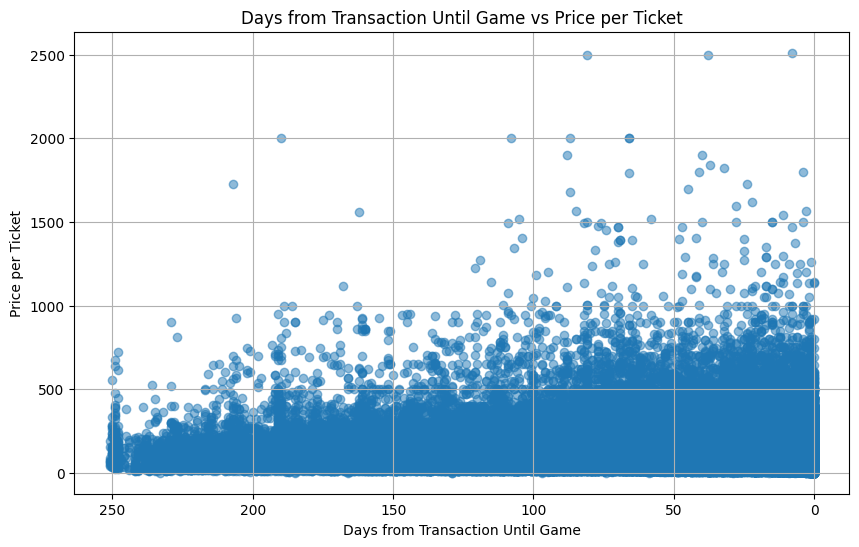

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['days_from_transaction_until_game'], df['price_per_ticket'], alpha=0.5)
plt.title('Days from Transaction Until Game vs Price per Ticket')
plt.xlabel('Days from Transaction Until Game')
plt.ylabel('Price per Ticket')
plt.gca().invert_xaxis()  # Invert the x-axis
plt.grid(True)
plt.show()

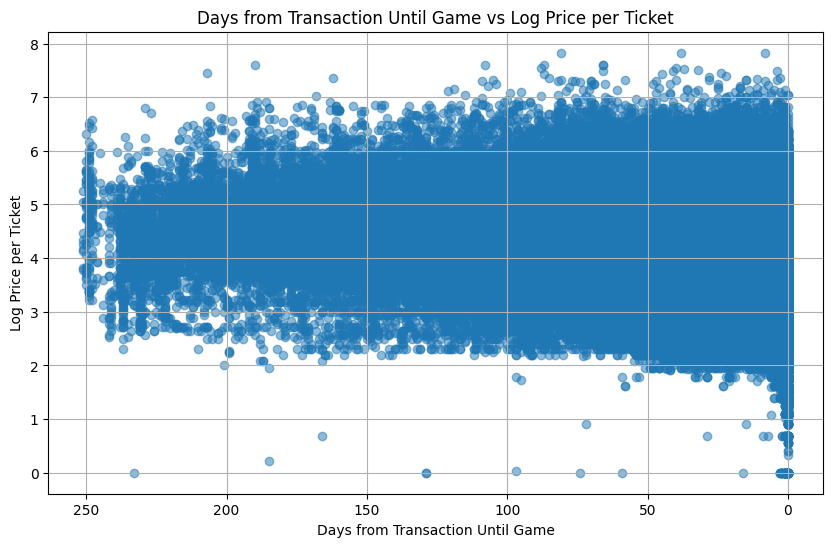

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['days_from_transaction_until_game'], df['logprice'], alpha=0.5)
plt.title('Days from Transaction Until Game vs Log Price per Ticket')
plt.xlabel('Days from Transaction Until Game')
plt.ylabel('Log Price per Ticket')
plt.gca().invert_xaxis()  # Invert the x-axis
plt.grid(True)
plt.show()

How do the prices consumers pay for tickets change as the game date approaches 
(i.e., as the number of days between transaction date and game date declines)?

regression results seem to inidicate one way


In [35]:
columns_to_check = ['sectiontype', 'number_of_tickets', 'gamemonth', 'team', 'day_game', 'weekend_game', 'year']

most_frequent_values = {}
for column in columns_to_check:
    most_frequent_values[column] = df[column].value_counts().idxmax()

most_frequent_values

{'sectiontype': 'LowerBleachers',
 'number_of_tickets': 2,
 'gamemonth': 'MAY',
 'team': 'NYY',
 'day_game': 0.0,
 'weekend_game': 1.0,
 'year': '2011'}

In [36]:
# Filter the dataframe for the team 'NYY'
df_nyy = df[df['team'] == 'NYY']

most_frequent_values = {}
for column in columns_to_check:
    most_frequent_values[column] = df_nyy[column].value_counts().idxmax()
    
most_frequent_values

{'sectiontype': 'LowerBleachers',
 'number_of_tickets': 2,
 'gamemonth': 'APR',
 'team': 'NYY',
 'day_game': 0.0,
 'weekend_game': 1.0,
 'year': '2011'}

In [37]:
df_nyy['gamemonth'].value_counts()

gamemonth
APR    21574
AUG    18218
MAY     5002
JUN     4507
JUL     4408
SEP     3094
OCT     2829
Name: count, dtype: int64

In [38]:
filtered_df = df[
    (df['team'] == 'NYY') &
    (df['sectiontype'] == 'LowerBleachers') &
    (df['number_of_tickets'] == 2) &
    (df['gamemonth'] == 'APR') &
    (df['day_game'] == 0.0) &
    (df['weekend_game'] == 1.0) &
    (df['year'] == '2011')
]

filtered_df

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
289502,2_1,LowerBleachers,99.0,2,APR,NYY,0.0,1.0,APR 10,4.595120,71,2011
289577,3_30,LowerBleachers,75.0,2,APR,NYY,0.0,1.0,APR 10,4.317488,11,2011
289605,2_1,LowerBleachers,175.0,2,APR,NYY,0.0,1.0,APR 10,5.164786,71,2011
289616,4_7,LowerBleachers,52.0,2,APR,NYY,0.0,1.0,APR 10,3.951244,3,2011
289818,3_21,LowerBleachers,110.0,2,APR,NYY,0.0,1.0,APR 10,4.700480,20,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
311280,4_8,LowerBleachers,55.0,2,APR,NYY,0.0,1.0,APR 10,4.007333,2,2011
311356,3_18,LowerBleachers,100.0,2,APR,NYY,0.0,1.0,APR 10,4.605170,23,2011
311397,4_8,LowerBleachers,57.0,2,APR,NYY,0.0,1.0,APR 10,4.043051,2,2011
311419,3_16,LowerBleachers,113.0,2,APR,NYY,0.0,1.0,APR 10,4.727388,25,2011


In [39]:
df = df[df['price_per_ticket'] <= 4000]
df

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
0,2_1,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142,2009
1,2_1,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143,2009
2,2_1,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142,2009
3,2_1,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142,2009
4,2_1,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
453166,6_8,RFFieldBox,54.94,3,JUN,WAS,0.0,1.0,JUN 8,4.006242,0,2012
453167,6_10,IFGS,29.00,2,JUN,WAS,1.0,1.0,JUN 10,3.367296,0,2012
453168,6_7,UpperBleachers,18.93,2,JUN,WAS,0.0,1.0,JUN 8,2.940748,1,2012
453169,4_22,LogeBox,139.00,2,JUN,WAS,1.0,1.0,JUN 9,4.934474,49,2012


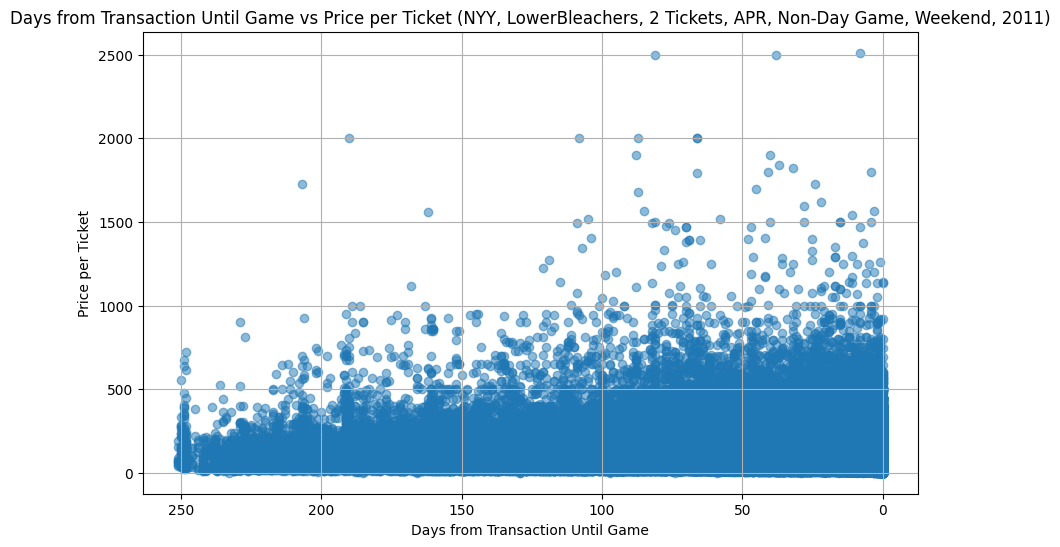

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['days_from_transaction_until_game'], df['price_per_ticket'], alpha=0.5)
plt.title('Days from Transaction Until Game vs Price per Ticket (NYY, LowerBleachers, 2 Tickets, APR, Non-Day Game, Weekend, 2011)')
plt.xlabel('Days from Transaction Until Game')
plt.ylabel('Price per Ticket')
plt.gca().invert_xaxis()  # Invert the x-axis
plt.grid(True)
plt.show()

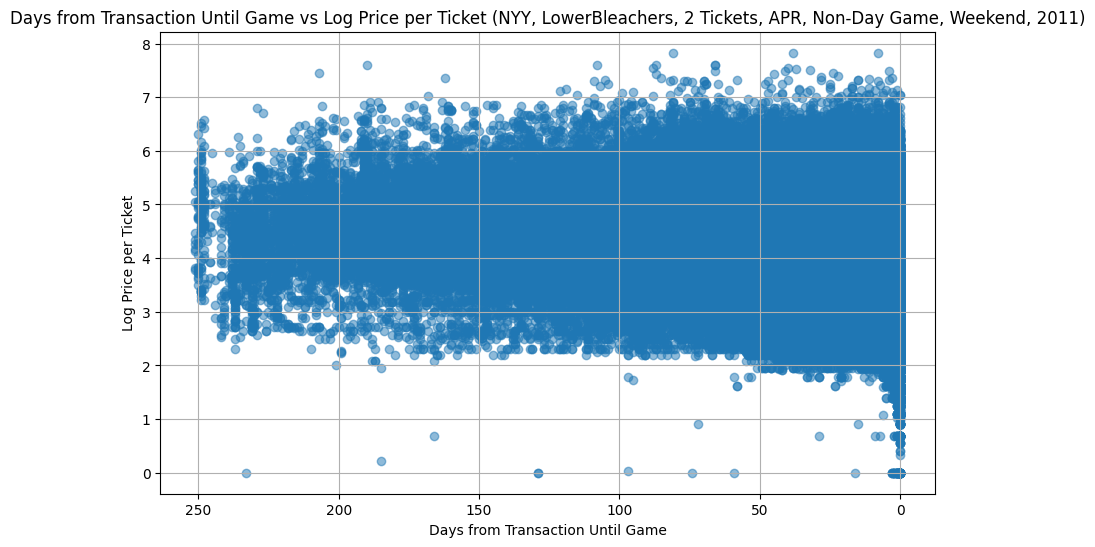

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['days_from_transaction_until_game'], df['logprice'], alpha=0.5)
plt.title('Days from Transaction Until Game vs Log Price per Ticket (NYY, LowerBleachers, 2 Tickets, APR, Non-Day Game, Weekend, 2011)')
plt.xlabel('Days from Transaction Until Game')
plt.ylabel('Log Price per Ticket')
plt.gca().invert_xaxis()  # Invert the x-axis
plt.grid(True)
plt.show()

In [42]:
df.to_csv('compiled_df.csv', index=False)